# Schedule matching (observed to theoretical)

In [25]:
from custom_functions.gtfs_methods import get_largest_group,get_schedule
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)

In [26]:
# Theoretical imports
try:
    headway_qos = pd.read_pickle("data/computed/theoretical_schedule_qos.pkl")
except Exception as e:
    raise e

calendar_dates = pd.read_csv('data/timetables/gtfs3Sept/calendar_dates.txt', sep = ",")
calendar = pd.read_csv('data/timetables/gtfs3Sept/calendar.txt', sep = ",")
trips = pd.read_csv('data/timetables/gtfs3Sept/trips.txt', sep = ",")
stops = pd.read_csv('data/timetables/gtfs3Sept/stops.txt', sep = ",")
stop_times = pd.read_csv('data/timetables/gtfs3Sept/stop_times.txt', sep = ",")
routes = pd.read_csv('data/timetables/gtfs3Sept/routes.txt', sep = ",")

In [27]:
transport_type = routes[["route_short_name", "route_type"]]

In [32]:
headway_qos[(headway_qos.route_short_name == "7") & (headway_qos.service_id == 237534000) & (headway_qos.direction_id == 1)].to_csv("7-line-output.csv")

In [4]:
get_schedule(headway_qos,stops,6,1, "LOUIS BERTRAND")[0].sort_values(by = "time_seconds")

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,pickup_type,drop_off_type,stop_code,stop_name,stop_desc,stop_lat,stop_lon,zone_id,stop_url,location_type,parent_station,route_id,service_id,trip_headsign,direction_id,block_id,shape_id,route_short_name,route_long_name,route_desc,route_type,route_url,route_color,route_text_color,time_seconds,headway_min
1976177,113339168237534000,05:11:45,05:11:45,5305G,11,0,0,NaN,LOUIS BERTRAND,NaN,50.865454,4.385088,NaN,NaN,0,NaN,6,237534000,VANDERKINDERE,1,8944464,007t0697,7,VANDERKINDERE - HEYSEL,NaN,0,NaN,ECE354,000000,18705,NaN
1976178,113339244237534000,05:40:45,05:40:45,5305G,12,0,0,NaN,LOUIS BERTRAND,NaN,50.865454,4.385088,NaN,NaN,0,NaN,6,237534000,VANDERKINDERE,1,8944456,007t0634,7,VANDERKINDERE - HEYSEL,NaN,0,NaN,ECE354,000000,20445,29.0
1976060,113338928237534000,05:52:45,05:52:45,5305G,12,0,0,NaN,LOUIS BERTRAND,NaN,50.865454,4.385088,NaN,NaN,0,NaN,6,237534000,VANDERKINDERE,1,8944450,007t0634,7,VANDERKINDERE - HEYSEL,NaN,0,NaN,ECE354,000000,21165,12.0
1976061,113338929237534000,06:02:45,06:02:45,5305G,12,0,0,NaN,LOUIS BERTRAND,NaN,50.865454,4.385088,NaN,NaN,0,NaN,6,237534000,VANDERKINDERE,1,8944458,007t0634,7,VANDERKINDERE - HEYSEL,NaN,0,NaN,ECE354,000000,21765,10.0
1976062,113338931237534000,06:10:45,06:10:45,5305G,12,0,0,NaN,LOUIS BERTRAND,NaN,50.865454,4.385088,NaN,NaN,0,NaN,6,237534000,VANDERKINDERE,1,8944455,007t0634,7,VANDERKINDERE - HEYSEL,NaN,0,NaN,ECE354,000000,22245,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1976153,113339138237534000,24:18:45,24:18:45,5305G,12,0,0,NaN,LOUIS BERTRAND,NaN,50.865454,4.385088,NaN,NaN,0,NaN,6,237534000,BUYL,1,8944451,007t0612,7,VANDERKINDERE - HEYSEL,NaN,0,NaN,ECE354,000000,87525,9.0
1976163,113339150237534000,24:26:45,24:26:45,5305G,12,0,0,NaN,LOUIS BERTRAND,NaN,50.865454,4.385088,NaN,NaN,0,NaN,6,237534000,BUYL,1,8944458,007t0612,7,VANDERKINDERE - HEYSEL,NaN,0,NaN,ECE354,000000,88005,8.0
1976165,113339152237534000,24:41:45,24:41:45,5305G,12,0,0,NaN,LOUIS BERTRAND,NaN,50.865454,4.385088,NaN,NaN,0,NaN,6,237534000,BUYL,1,8944472,007t0612,7,VANDERKINDERE - HEYSEL,NaN,0,NaN,ECE354,000000,88905,15.0
1976161,113339148237534000,24:56:45,24:56:45,5305G,12,0,0,NaN,LOUIS BERTRAND,NaN,50.865454,4.385088,NaN,NaN,0,NaN,6,237534000,BUYL,1,8944461,007t0612,7,VANDERKINDERE - HEYSEL,NaN,0,NaN,ECE354,000000,89805,15.0


## Extracting observed Schedule

In [129]:
calendar[calendar.service_id == get_schedule(headway_t,stops,6,1, "LOUIS BERTRAND")[1][3]]

,service_id,monday,tuesday,wednesday,thursday,friday,saturday,sunday,start_date,end_date
34,237534000,1,1,1,1,1,0,0,20210901,20210917


In [7]:
# Observed
path_to_export_observed_headways_0 = "data/computed/observed_schedule_dist_0.pkl" 
headways_0 = pd.read_pickle(path_to_export_observed_headways_0)

In [4]:
headways_0

,date,time,route_short_name,distance_from_point,stop_id,stop_id_terminus,time_seconds,headway_min
0,07-09-2021,12:14:33,13,0,1008,4111,44073,NaN
1,07-09-2021,12:15:06,13,0,1008,4111,44106,0.550000
2,07-09-2021,12:15:37,13,0,1008,4111,44137,0.516667
3,07-09-2021,12:16:09,13,0,1008,4111,44169,0.533333
4,07-09-2021,12:16:41,13,0,1008,4111,44201,0.533333
...,...,...,...,...,...,...,...,...
6886233,20-09-2021,18:28:37,61,0,9996,9996,66517,1091.133333
6886234,20-09-2021,18:29:07,61,0,9996,9996,66547,0.500000
6886235,20-09-2021,18:29:37,61,0,9996,9996,66577,0.500000
6886236,20-09-2021,18:30:10,61,0,9996,9996,66610,0.550000


In [9]:
groups_O = headways_0.groupby(by=["date", "route_short_name", "stop_id", "stop_id_terminus"])

### Issue with stop
Having the position every 30 sec doesn't give the arrival time nor leaving time

In [11]:
sample_0 =  get_largest_group(groups_O).sort_values(by="time_seconds").drop_duplicates(subset="time_seconds")
sample_0

,date,time,route_short_name,distance_from_point,stop_id,stop_id_terminus,time_seconds,headway_min
3155420,16-09-2021,00:00:41,38,0,3323,4076,41,NaN
3155421,16-09-2021,00:01:11,38,0,3323,4076,71,0.500000
3155422,16-09-2021,00:01:42,38,0,3323,4076,102,0.516667
3155423,16-09-2021,00:02:12,38,0,3323,4076,132,0.500000
3155424,16-09-2021,00:02:42,38,0,3323,4076,162,0.500000
...,...,...,...,...,...,...,...,...
3155415,16-09-2021,23:57:33,38,0,3323,4076,86253,0.500000
3155416,16-09-2021,23:58:04,38,0,3323,4076,86284,0.516667
3155417,16-09-2021,23:58:34,38,0,3323,4076,86314,0.500000
3155418,16-09-2021,23:59:05,38,0,3323,4076,86345,0.516667


In [13]:
sample_0.time_seconds

3155420       41
3155421       71
3155422      102
3155423      132
3155424      162
           ...  
3155415    86253
3155416    86284
3155417    86314
3155418    86345
3155419    86376
Name: time_seconds, Length: 2025, dtype: int64

In [14]:
for i in range(1, len(sample_0.time_seconds)):
    d = sample_0.time_seconds.iloc[i] - sample_0.time_seconds.iloc[i-1] 
    if d not in [30, 31, 32]:
        print(d)

33
33
250
152
181
211
62
63
124
123
62
154
63
90
151
61
122
62
92
61
95
156
94
184
90
92
60
121
122
62
219
151
91
152
91
61
63
63
123
185
63
217
61
63
62
61
62
61
150
61
90
61
60
277
157
93
62
249
367
62
91
156
61
311
183
371
33
64
192
330
154
388
288
96
223
127
62
33
127
62
154
33
99
34
470
33
129
219
62
92
34
258
63
158
191
500
257
121
121
91
60
332
120
154
64
62
63
62
126
63
61
92
440
124
92
61
247
62
126
64
395
95
65
97
227
93
65
63
125
126
65
64
63
249
159
250
218
188
248
33
94
218
93
276
33
33
33
158
33
33
97
206
33
33
34
33
34
34
33
33
33
33
33
33
33
33
33
34
33
33
33
33
33
33
34
33
33
33
33
33
33
34
65
33
35
33
33
33
33
33
33
33
33
33
33
34
33
34
34
33
34
34
33
34
34
34
33
33
35
33
33
34
33
33
33
34
33
33
33
33
33
61
33
33
33
33
34
33
35
34
33
33
14
33
33
94
157
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
63
35
33
33
33
33
33
33
33
33
33
33
96
33
33
34
34
33
33
33
33
33
34
33
34
33
34
33
34
34
33
33
33
33
33
34
33
33
33
34
34
315
33
33
33
33
33
33
33
33
33
33
33
34
34

### Re-cleaning the observed data

### Move Detection

In [27]:
# Observed
path_to_export_observed_headways = "data/computed/observed_schedule.pkl" 
headways = pd.read_pickle(path_to_export_observed_headways)
time_sec_name = "time_seconds"
time = headways["time"].str.split(":", expand=True)
headways[time_sec_name] = (
    time[0].astype(int) * 3600 + time[1].astype(int) * 60 + time[2].astype(int)
)
headways

,date,time,route_short_name,distance_from_point,stop_id,stop_id_terminus,time_seconds
0,19-09-2021,10:33:18,1,1,8022,8161,37998
1,19-09-2021,10:33:18,1,1,8732,8161,37998
2,19-09-2021,10:33:18,1,1,8071,8731,37998
3,19-09-2021,10:33:18,1,0,8152,8161,37998
4,19-09-2021,10:33:18,1,1,8271,8731,37998
...,...,...,...,...,...,...,...
19421878,14-09-2021,12:25:54,97,232,6109,6361,44754
19421879,14-09-2021,12:25:54,98,0,3810,1951,44754
19421880,14-09-2021,12:25:54,98,0,1951,2382,44754
19421881,14-09-2021,12:25:54,98,270,3815,2382,44754


In [24]:
time = headways["time"].str.split(":", expand=True)
time

,0,1,2
0,10,01,18
1,10,01,18
2,10,01,18
3,10,01,18
4,10,01,18
...,...,...,...
19421878,12,01,54
19421879,12,01,54
19421880,12,01,54
19421881,12,01,54


In [26]:
time[1].unique()

array(['01'], dtype=object)

### Tram 7

In [28]:
LB = stops[stops.stop_name == "LOUIS BERTRAND"]
LB

,stop_id,stop_code,stop_name,stop_desc,stop_lat,stop_lon,zone_id,stop_url,location_type,parent_station
878,2345,NaN,LOUIS BERTRAND,NaN,50.866066,4.384904,NaN,NaN,0,NaN
1501,3409,NaN,LOUIS BERTRAND,NaN,50.866191,4.386083,NaN,NaN,0,NaN
1992,5305G,NaN,LOUIS BERTRAND,NaN,50.865454,4.385088,NaN,NaN,0,NaN
2007,5357,NaN,LOUIS BERTRAND,NaN,50.866749,4.385387,NaN,NaN,0,NaN


In [29]:
#headways_7 = headways[(headways.route_short_name == "7") & (headways.stop_id == "5357") & (headways.date == "16-09-2021") & (headways.stop_id_terminus == "5770")]
headways_7 = headways[(headways.route_short_name == "7") & (headways.stop_id == "5357")]
headways_7

,date,time,route_short_name,distance_from_point,stop_id,stop_id_terminus,time_seconds
3161,19-09-2021,10:37:06,7,3,5357,9051,38226
3570,19-09-2021,10:37:38,7,113,5357,9051,38258
12801,19-09-2021,10:49:01,7,42,5357,9051,38941
13201,19-09-2021,10:49:34,7,42,5357,9051,38974
13647,19-09-2021,10:50:06,7,42,5357,9051,39006
...,...,...,...,...,...,...,...
19390420,14-09-2021,11:43:21,7,0,5357,9051,42201
19390979,14-09-2021,11:43:53,7,42,5357,9051,42233
19391535,14-09-2021,11:44:25,7,119,5357,9051,42265
19397425,14-09-2021,11:49:41,7,1,5357,9051,42581


In [30]:
groups = headways_7.groupby(by=["date", "route_short_name", "stop_id", "stop_id_terminus"])

In [31]:
sample_7 =  get_largest_group(groups)[1]
sample_7.sort_values(by="time_seconds")

,date,time,route_short_name,distance_from_point,stop_id,stop_id_terminus,time_seconds
15333916,16-09-2021,04:51:46,7,48,5357,9051,17506
15335682,16-09-2021,05:03:37,7,0,5357,9051,18217
15335759,16-09-2021,05:04:09,7,0,5357,9051,18249
15335859,16-09-2021,05:04:41,7,0,5357,9051,18281
15337258,16-09-2021,05:12:11,7,0,5357,9051,18731
...,...,...,...,...,...,...,...
5825178,16-09-2021,23:40:33,7,42,5357,9051,85233
5825514,16-09-2021,23:41:04,7,42,5357,9051,85264
5825824,16-09-2021,23:41:34,7,42,5357,9051,85294
5826135,16-09-2021,23:42:04,7,42,5357,9051,85324


In [32]:
sample_7.sort_values(by="time_seconds").head(50)

,date,time,route_short_name,distance_from_point,stop_id,stop_id_terminus,time_seconds
15333916,16-09-2021,04:51:46,7,48,5357,9051,17506
15335682,16-09-2021,05:03:37,7,0,5357,9051,18217
15335759,16-09-2021,05:04:09,7,0,5357,9051,18249
15335859,16-09-2021,05:04:41,7,0,5357,9051,18281
15337258,16-09-2021,05:12:11,7,0,5357,9051,18731
15337376,16-09-2021,05:12:43,7,142,5357,9051,18763
15345829,16-09-2021,05:38:52,7,7,5357,9051,20332
15346030,16-09-2021,05:39:24,7,44,5357,9051,20364
15348944,16-09-2021,05:45:39,7,3,5357,9051,20739
15349214,16-09-2021,05:46:09,7,17,5357,9051,20769


In [33]:
speeds_kph = {
    "bus" : 15.6,
    "tram" : 16.3,
    "metro" : 27.9, 
}
speeds_ms = {
    "bus" : 4.333333333333333,
    "tram" : 4.527777777777778,
    "metro" : 7.749999999999999, 

}

def turn_sec_to_hours(time_in_sec:float)->str:
    hours = int(time_in_sec/3600)
    minutes = int(((time_in_sec/3600) - hours)*60)
    seconds = int(time_in_sec - hours * 3600 - minutes * 60)
    if len(str(minutes)) == 1:
        minutes = '0' + str(minutes)
    if len(str(hours)) == 1:
        hours = '0' + str(hours)
    if len(str(seconds)) == 1:
        seconds = '0' + str(seconds)
    return str(hours) + ":" + str(minutes) + ":" + str(seconds)  
    
def extract_schedule(schedule:pd.DataFrame, transporation_type:str, distance_col:str = "distance_from_point", speeds_ms:dict[int, int] = {
    3 : 4.333333333333333,
    0 : 4.527777777777778,
    1 : 7.749999999999999, 

} ) -> pd.DataFrame:
    schedule["lag_-1"] = schedule[distance_col].shift(1)
    extracted_ = schedule[(schedule["lag_-1"] > schedule[distance_col])]

    if (schedule.iloc[0][distance_col] > 0) | (schedule.iloc[0][distance_col] == 0 & schedule.iloc[1][distance_col] > 0):
        #extracted_ = extracted_.append(schedule.iloc[0])
        extracted_ = pd.concat([extracted_, schedule.head(1)])

    extracted_["adjusted_arrival_time(ts)"] = round(extracted_.time_seconds - (extracted_.distance_from_point/speeds_ms.get(transporation_type)),3)
    extracted_["adjusted_arrival_time"] = extracted_["adjusted_arrival_time(ts)"].apply(turn_sec_to_hours)

    return extracted_.sort_values(by = "adjusted_arrival_time(ts)")
    


In [34]:
extract_schedule(sample_7, 0)

,date,time,route_short_name,distance_from_point,stop_id,stop_id_terminus,time_seconds,lag_-1,adjusted_arrival_time(ts),adjusted_arrival_time
15335682,16-09-2021,05:03:37,7,0,5357,9051,18217,48.0,18217.000,05:03:37
15345829,16-09-2021,05:38:52,7,7,5357,9051,20332,142.0,20330.454,05:38:50
15348944,16-09-2021,05:45:39,7,3,5357,9051,20739,44.0,20738.337,05:45:38
15364882,16-09-2021,06:11:05,7,42,5357,9051,22265,219.0,22255.724,06:10:55
15375166,16-09-2021,06:23:35,7,4,5357,9051,23015,42.0,23014.117,06:23:34
...,...,...,...,...,...,...,...,...,...,...
5777854,16-09-2021,22:27:22,7,5,5357,9051,80842,42.0,80840.896,22:27:20
5790412,16-09-2021,22:44:26,7,42,5357,9051,81866,208.0,81856.724,22:44:16
5799211,16-09-2021,22:56:53,7,7,5357,9051,82613,42.0,82611.454,22:56:51
5816865,16-09-2021,23:26:05,7,48,5357,9051,84365,71.0,84354.399,23:25:54


## Max schedule per line

In [4]:
headway_qos_g = headway_qos.groupby(by=["route_short_name", "stop_id", "direction_id", "service_id"])

In [6]:
import json
boundaries = {}
for name, group in headway_qos_g:
    if group.shape[0] > boundaries.get(group.iloc[0].route_short_name, 0):
        boundaries[group.iloc[0].route_short_name] = group.shape[0]

with open('data/computed/route_bound.json', 'w') as fp:
    json.dump(boundaries, fp)

In [6]:
count_one = 0
count = 0
for name, group in headway_qos_g:
    if group.shape[0] < 10 :
        count_one += 1
    count += 1

count_one, count

(6144, 41918)

In [7]:
t = np.array([group.shape[0] for name, group in headway_qos_g])

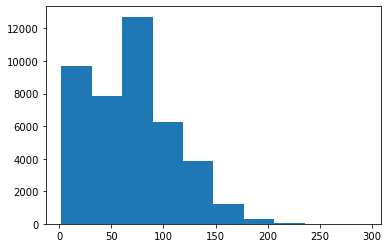

In [14]:
import matplotlib.pyplot as plt
plt.hist(t) 
plt.show()

## Matching observed with theoretical

In [16]:
obs = pd.read_pickle("data/computed/observed_schedule_dist_0.pkl")

In [21]:
sample = obs[(obs.route_short_name == "7") & (obs.stop_id == "5357") & (obs.stop_id_terminus == "9051") & (obs.date == "16-09-2021")]
sample

,date,time,route_short_name,distance_from_point,stop_id,stop_id_terminus,route_type,current_stop_name,terminus_stop_name,time_seconds,lag_-1,adjusted_arrival_time(ts),adjusted_arrival_time,headway_min
2422157,16-09-2021,05:03:37,7,0,5357,9051,0,LOUIS BERTRAND,NaN,18217,48.0,18217.000,05:03:37,NaN
2422158,16-09-2021,05:38:52,7,7,5357,9051,0,LOUIS BERTRAND,NaN,20332,142.0,20330.454,05:38:50,35.224233
2422159,16-09-2021,05:45:39,7,3,5357,9051,0,LOUIS BERTRAND,NaN,20739,44.0,20738.337,05:45:38,6.798050
2422160,16-09-2021,06:11:05,7,42,5357,9051,0,LOUIS BERTRAND,NaN,22265,219.0,22255.724,06:10:55,25.289783
2422161,16-09-2021,06:23:35,7,4,5357,9051,0,LOUIS BERTRAND,NaN,23015,42.0,23014.117,06:23:34,12.639883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2422255,16-09-2021,22:27:22,7,5,5357,9051,0,LOUIS BERTRAND,NaN,80842,42.0,80840.896,22:27:20,31.152867
2422256,16-09-2021,22:44:26,7,42,5357,9051,0,LOUIS BERTRAND,NaN,81866,208.0,81856.724,22:44:16,16.930467
2422257,16-09-2021,22:56:53,7,7,5357,9051,0,LOUIS BERTRAND,NaN,82613,42.0,82611.454,22:56:51,12.578833
2422258,16-09-2021,23:26:05,7,48,5357,9051,0,LOUIS BERTRAND,NaN,84365,71.0,84354.399,23:25:54,29.049083


In [22]:
headway_qos[(obs.route_short_name == "7") & (obs.stop_id == "5357") & (obs.stop_id_terminus == "9051") & (obs.date == "16-09-2021")]

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,pickup_type,drop_off_type,stop_code,stop_name,stop_desc,stop_lat,stop_lon,zone_id,stop_url,location_type,parent_station,route_id,service_id,trip_headsign,direction_id,block_id,shape_id,route_short_name,route_long_name,route_desc,route_type,route_url,route_color,route_text_color,time_seconds,headway_min,clusters,cluster_agg_value,regularity
0,112360063233813600,05:17:00,05:17:00,0089,1,0,0,NaN,MONTGOMERY,NaN,50.838006,4.408970,NaN,NaN,0,37.0,40,233813600,TERVUREN STATION,0,8862002,044t0076,44,MONTGOMERY - TERVUREN STATION,NaN,0,NaN,E3BA12,000000,19020,NaN,cluster_0,30.0,0
1,112360064233813600,05:50:00,05:50:00,0089,1,0,0,NaN,MONTGOMERY,NaN,50.838006,4.408970,NaN,NaN,0,37.0,40,233813600,TERVUREN STATION,0,8862004,044t0076,44,MONTGOMERY - TERVUREN STATION,NaN,0,NaN,E3BA12,000000,21000,33.0,cluster_0,30.0,0
2,112360065233813600,06:19:00,06:19:00,0089,1,0,0,NaN,MONTGOMERY,NaN,50.838006,4.408970,NaN,NaN,0,37.0,40,233813600,TERVUREN STATION,0,8862002,044t0076,44,MONTGOMERY - TERVUREN STATION,NaN,0,NaN,E3BA12,000000,22740,29.0,cluster_0,30.0,0
3,112360066233813600,06:49:00,06:49:00,0089,1,0,0,NaN,MONTGOMERY,NaN,50.838006,4.408970,NaN,NaN,0,37.0,40,233813600,TERVUREN STATION,0,8862004,044t0076,44,MONTGOMERY - TERVUREN STATION,NaN,0,NaN,E3BA12,000000,24540,30.0,cluster_0,30.0,0
4,112360067233813600,07:19:00,07:19:00,0089,1,0,0,NaN,MONTGOMERY,NaN,50.838006,4.408970,NaN,NaN,0,37.0,40,233813600,TERVUREN STATION,0,8862002,044t0076,44,MONTGOMERY - TERVUREN STATION,NaN,0,NaN,E3BA12,000000,26340,30.0,cluster_0,30.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2819466,113543415238463502,20:43:00,20:43:00,9996,17,1,0,NaN,MONTGOMERY,NaN,50.837483,4.406117,NaN,NaN,0,NaN,59,238463502,MONTGOMERY,0,8963879,061b0014,61,GARE DU NORD - MONTGOMERY,NaN,3,NaN,FFDC01,000000,74580,148.0,cluster_0,53.0,0
2819467,113543406238463502,21:36:00,21:36:00,9996,17,1,0,NaN,MONTGOMERY,NaN,50.837483,4.406117,NaN,NaN,0,NaN,59,238463502,MONTGOMERY,0,8963876,061b0014,61,GARE DU NORD - MONTGOMERY,NaN,3,NaN,FFDC01,000000,77760,53.0,cluster_0,53.0,0
2819468,113543441238463502,23:35:00,23:35:00,9996,17,1,0,NaN,MONTGOMERY,NaN,50.837483,4.406117,NaN,NaN,0,NaN,59,238463502,MONTGOMERY,0,8963912,061b0014,61,GARE DU NORD - MONTGOMERY,NaN,3,NaN,FFDC01,000000,84900,119.0,cluster_0,53.0,0
2819469,113543485238463502,23:55:00,23:55:00,9996,17,1,0,NaN,MONTGOMERY,NaN,50.837483,4.406117,NaN,NaN,0,NaN,59,238463502,MONTGOMERY,0,8963877,061b0014,61,GARE DU NORD - MONTGOMERY,NaN,3,NaN,FFDC01,000000,86100,20.0,cluster_0,53.0,0
